#  1、TensorFlow编程模型

### TensorFlow的命名来源于本身的运行原理。Tensor(张量)意味着N维数组，Flow(流)意味着基于数据流图的计算。TensorFlow是张量从图像的一端流动到另一端的计算过程。

## 1.1 了解模型的运行机制

### TensorFlow的运行机制属于‘定义’和‘运行’相分离。从操作层面可以抽象成两种：模型构建和模型运行。
### 在模型的构建过程中，需要先了解几个概念。如下下表所示：

In [1]:
from pandas import DataFrame

In [2]:
name = ['张量(tensor)','变量(variable)','占位符(placeholder)','图中的节点操作(operation, OP)']
meaning = ['数据，即某一类型的多维数组','常用于定义模型中的参数，时通过不断训练得到的值','输入变量的载体。也可以理解成定义函数时的参数','即一个OP获得0个或多个tensor，执行计算，输出额外的0个或多个tensor']
concepts = {'名称':name,'含义':meaning}

In [3]:
DataFrame.from_dict(concepts)

,名称,含义
0,张量(tensor),数据，即某一类型的多维数组
1,变量(variable),常用于定义模型中的参数，时通过不断训练得到的值
2,占位符(placeholder),输入变量的载体。也可以理解成定义函数时的参数
3,"图中的节点操作(operation, OP)",即一个OP获得0个或多个tensor，执行计算，输出额外的0个或多个tensor


### 上表中定义的内容都是在一个叫做‘图’的容器中完成的。关于‘图’，有以下几点需要理解：
#### （1）一个‘图’代表一个计算任务
#### （2）在模型运行的环节中，‘图’会在会话(session)里被启动
#### （3）session 将图的OP分发到如CPU或GPU之类的设备上，同时提供执行OP的方法。
### 这些方法执行后，将产生的tensor返回。在python语言中，返回的tensor是numpy.ndarray对象
### session 与图的交互过程中还定义了一下两种数据的流向机制：
#### （1）注入机制(feed)：通过占位符向模式中传入数据
#### （2）取回机制(fetch)：从模型中得到结果
### 下面通过实例逐个演示session在各种情况下的用法。先从session的建立开始，接着演示session与图的交互机制，最后演示如何在session中指定GPU运算资源

## 1.2 实例1：编写Hello world程序演示session的使用

In [4]:
import tensorflow as tf

In [5]:
# 建立一个session，在session中输出 'Hello world!'
hello = tf.constant('Hello world!')

sess = tf.Session()
print(sess.run(hello))
sess.close()

b'Hello world!'


### tf.constant 定义的是一个常量，hello的内容只有在session的run内才可以返回。试试在sess前print(hello):

In [6]:
hello = tf.constant('Hello world!')

print(hello)
sess = tf.Session()
print(sess.run(hello))
sess.close()

Tensor("Const_1:0", shape=(), dtype=string)
b'Hello world!'


## 1.3 实例2：演示 with session 的使用

### with session 的用法是最常见的，它沿用了Python中的as语法，即：当程序结束后自动关闭session，而不需要再去写close。代码如下：

In [7]:
# 使用with session建立session，并在session中计算两个变量(3和4)的和与乘积，并打印出来
a = tf.constant(3)    # 定义常量3
b = tf.constant(4)    # 定义常量4

with tf.Session() as sess:
    print("相加：%i"%sess.run(a+b))
    print("相乘：%i"%sess.run(a*b))

相加：7
相乘：12


## 1.4 实例3：演示注入机制

#### 扩展实例2：使用注入机制，将具体的实参注入到相应的placeholder中。feed只在调用它的方法内有效，方法结束后feed就会消失

In [8]:
# 定义占位符，使用feed机制将具体数值(3和4)通过占位符传入，进行相加和相乘运算，并打印出计算结果

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a,b)                # 相加
mul = tf.multiply(a,b)           # 相乘
with tf.Session() as sess:
    # 计算具体数值
    print("相加：%i"%sess.run(add,feed_dict={a:3,b:4}))
    print("相乘：%i"%sess.run(mul,feed_dict={a:3,b:4}))

相加：7
相乘：12


### 标记的方法：使用 tf.placeholder 为这些操作创建占位符，然后使用 feed_dict 把具体的值放到占位符里

## 1.5 建立session的其他方法

### 建立 session 还有一下两种方式：
#### （1）交互式 session 方式：一般在 jupyter 环境下使用较多，具体用法与前面的 with session 类似。代码如下：
$sess = tf.InteractiveSession()$
#### （2）使用 Supervisor 方式：该方式比较高级，使用起来也更加复杂。它可以自动处理 session 中的具体任务，例如：载入/载出检查点文件、写入 TensorBoard 等，另外，该方法还支持分布式训练的部署

## 1.6 实例4：使用注入机制获取节点

### 在实例3中，其实还可以一次将多个节点取出来

In [9]:
# 使用 fetch 机制将定义在图中的节点数值算出来
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a,b)                # 相加
mul = tf.multiply(a,b)           # 相乘
with tf.Session() as sess:
    # 将 OP 运算通过 run 打印出来
    print("相加：%i"%sess.run(add,feed_dict={a:3,b:4}))
    # 将 add 节点打印出来
    print("相乘：%i"%sess.run(mul,feed_dict={a:3,b:4}))
    print(sess.run([mul,add],feed_dict={a:3,b:4}))

相加：7
相乘：12
[12, 7]


## 1.7 指定GPU运算

### 如果下载的 GPU 版本，在运行过程中 TensorFlow 能自动检测。如果检测到 GPU ，TensorFlow 会尽可能地利用找到的第一个 GPU 来执行操作
### 如果机器上有超过一个可用的 GPU ，除第一个之外的其他 GPU 默认是不参与计算的。为了让 TensorFlow 使用这些 GPU ，必须将 OP 明确指派给他们执行。with ... device 语句能用来指派特定的 CPU 或 GPU 执行操作：

In [ ]:
with tf.Session() as sess:
    wiht tf.device("/gpu:1"):
        a = tf.placeholder(tf.int16)
        b = tf.placeholder(tf.int16)
        add = tf.add(a,b)

### 设备用字符串进行标识。目前支持的设备包括以下几种：
#### cpu:0 ：机器的 CPU
#### gpu:0 ：机器的第一个 GPU ，如果有的话
#### gpu:1 ：机器的第二个 GPU ，依次类推
### 类似的还有通过 tf.ConfigProto 来构建一个 config ，在 config 中指定相关的 GPU ，并且在 session 中传入参数 config = '自己创建的config' 来指定 GPU 操作。
#### tf.ConfigProto 函数的参数：
##### log_device_placement = True ：是否打印设备分配日志
##### allow_soft_placement = True ：如果指定的设备不存在，允许 TensorFlow 自动分配设备
##### ex：

In [14]:
cofig = tf.ConfigProto(log_device_placement=True,allow_soft_placement=True)
sess = tf.Session(config=config)

## 1.8 设置 GPU 使用资源

### 1.7 中的 tf.ConfigProto 函数生成 config 之后，还可以设置其属性来分配 GPU 的运算资源。如下代码就是按需分配的意思。使用 allow_growth option，刚开始会分配少来的 GPU 容量，然后按需要慢慢地增加，由于不会释放内存，所以会导致碎片。

In [ ]:
config.gpu_options.allow_growth = True

### 同样，上述的代码也可以放在 config 创建时指定，ex：

In [16]:
gpu_options = tf.GPUOptions(allow_growth=True)
config = tf.ConfigProto(log_device_placement=True,allow_soft_placement=True,gpu_options=gpu_options)

### 以下代码还可以给 GPU 分配固定大小的计算资源

In [ ]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)   # 代表分配给 TensorFlow 的GPU现存大小为：GPU实际现存*0.7

## 1.9 保存和载入模型的方法介绍

### 一般而言，训练好的模型都需要保存。下面举例演示如何保存和载入模型

### 1.9.1 保存模型

#### 首先需要建立一个 saver ，然后在 session 中通过 saver 的 save 即可将模型保存起来。代码如下：

In [ ]:
# 之前是各种构建模型的操作(矩阵相乘，sigmoid等)
saver = tf.train.Saver() 
with tf.Session(config=cofig) as sess:
    sess.run(tf.global_variables_initializer())         # 先对模型初始化(初始化模型参数)
    ...                                                 # 然后将数据丢入模型进行训练
    saver.save(sess,'save_path/file_name')              # 如果 file_name 不存在，会自动创建

### 1.9.2 载入模型

#### 将模型保存好以后，载入也很方便。在 session 中通过调用 saver 的 restore() 函数，会从指定的路径找到模型文件，并覆盖到相关参数中。代码如下：

In [ ]:
saver = tf.train.Saver()

with tf.Session(config=cofig) as sess:               # 不必再次初始化模型参数，即使初始化，也会被 restore 的值给覆盖
    saver.restore(sess,'save_path/file_name')        # 会将已经保存的变量值 restore 到变量中

## 1.10 实例5：保存/载入线性回归模型

### 建模过程主要有四个步骤：
#### 准备数据 -> 搭建模型 -> 迭代训练 -> 使用模型
#### 其中，使用 TensorFlow 搭建一个模型主要有如下步骤：
##### 定义输入节点(常采用 placeholder ) -> 定义模型参数 -> 定义运算(前向传播过程) -> 定义优化目标(loss)、优化函数(optimizer)
#### 迭代训练中主要包含如下操作：
##### 建立 saver 及相关参数 -> 设置训练次数 -> 启动会话窗口 -> 初始化模型 -> 迭代训练 -> 适时打印训练信息并保存模型至本地

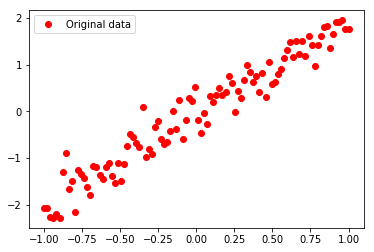

In [10]:
# 构建一个线性回归模型 (y = 2x)，训练并保存该模型本地
## 导入需要使用的函数库
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## 1、准备数据
train_x = np.linspace(-1,1,100)
train_y = 2*train_x + np.random.randn(len(train_x))*0.3    # y = 2x,但是加入了噪音
plt.plot(train_x,train_y,'ro',label='Original data')
plt.legend()
plt.show()

In [11]:
tf.reset_default_graph()
## 2、搭建模型
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
# 模型参数
weight = tf.Variable(tf.random_normal([1]),name='weight')
bias = tf.Variable(tf.zeros([1]),name='bias')
# 前向结构
z = tf.multiply(x,weight)+bias

In [12]:
# 定义优化目标与优化函数
cost = tf.reduce_mean(tf.square(z - y))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [13]:
## 3、训练模型
# 建立 saver 并设置相应的参数
saver = tf.train.Saver(max_to_keep=1)
savedir = 'regression/'

# 设置训练相关信息
training_epochs = 20           # 训练20次
display_epochs = 2             # 每训练两次显示一次模型的训练信息

# 启动会话窗口开始训练
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())         # 初始化模型
    for epoch in range(training_epochs):
        for (xx,yy) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict={x:xx,y:yy})   # 向模型输入数据开始训练
            
        if epoch % display_epochs == 0:
            loss = sess.run(cost,feed_dict={x:xx,y:yy})
            print('Epoch:%s, cost=%s, weight=%s, bias=%s'%(epoch+1,loss,sess.run(weight),sess.run(bias)))
        
    print('Fnished!')
    saver.save(sess,savedir+'linear.ckpt')           # 将模型保存在当前路径中的 regression 文件夹下，模型名称为 linear.ckpt
    

Epoch:1, cost=0.69826776, weight=[0.55811334], bias=[0.37620467]
Epoch:3, cost=0.008346383, weight=[1.5806049], bias=[0.09797869]
Epoch:5, cost=0.00658419, weight=[1.8574071], bias=[-0.00632189]
Epoch:7, cost=0.015727958, weight=[1.9291885], bias=[-0.03383522]
Epoch:9, cost=0.01872838, weight=[1.9477524], bias=[-0.04095853]
Epoch:11, cost=0.01954666, weight=[1.9525518], bias=[-0.0428003]
Epoch:13, cost=0.01976121, weight=[1.9537935], bias=[-0.04327681]
Epoch:15, cost=0.019816786, weight=[1.9541141], bias=[-0.04339981]
Epoch:17, cost=0.019831253, weight=[1.9541975], bias=[-0.04343183]
Epoch:19, cost=0.01983498, weight=[1.9542189], bias=[-0.04343994]
Fnished!


#### 运行上述代码后，在代码的同级目录下 regression 文件夹里面生成了4个文件，这就是我们保存的模型。
#### 我们重启一个 session ，并命名为 sess2 ，在代码里通过使用 saver 的 restore 函数将模型载入

In [14]:
with tf.Session() as sess2:
    saver.restore(sess2,savedir+'linear.ckpt')
    print("x = 0.2,z = {}".format(sess2.run(z,feed_dict={x:0.2})))

INFO:tensorflow:Restoring parameters from regression/linear.ckpt
x = 0.2,z = [0.3474031]


## 1.11 实例6：分析模型内容

### 模型内容
#### 虽然模型已经保存了，但是仍然对我们不透明。下面通过将模型里的内容打印出来，看看模型里都保存了哪些东西？都是什么样的？

In [15]:
# 将实例5生成的模型里面的内容打印出来，观察其存放的具体数据方式
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

savedir = 'regression/'
print_tensors_in_checkpoint_file(savedir+'linear.ckpt',None,True,True)

tensor_name:  bias
[-0.04344136]
tensor_name:  weight
[1.9542223]


## 1.12 检查点(checkpoint)

### 保存模型并不限于在训练之后，在训练之中也需要保存，因为 TensorFlow 训练模型时难免会出现中断的情况。我们自然希望能够将辛苦得到的中间参数保留下来，否则下次又要重头开始。
### 这种在训练中保存模型，习惯上称之为保存检查点

## 1.13 实例7：为模型添加保存检查点

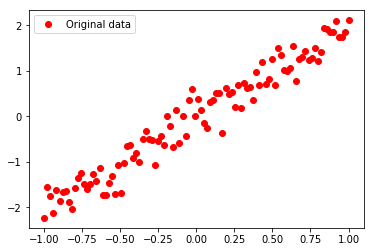

Epoch:1, cost=0.33193022, weight=[1.3787802], bias=[0.15590262]
Epoch:3, cost=0.059099257, weight=[1.8386555], bias=[0.02905786]
Epoch:5, cost=0.027443955, weight=[1.9629643], bias=[-0.01780979]
Epoch:7, cost=0.021253224, weight=[1.9951967], bias=[-0.03016486]
Epoch:9, cost=0.019781493, weight=[2.0035338], bias=[-0.03336387]
Epoch:11, cost=0.019409668, weight=[2.005689], bias=[-0.03419081]
Epoch:13, cost=0.019314123, weight=[2.0062463], bias=[-0.03440483]
Epoch:15, cost=0.019289447, weight=[2.0063903], bias=[-0.03446006]
Epoch:17, cost=0.019282958, weight=[2.0064282], bias=[-0.03447461]
Epoch:19, cost=0.0192816, weight=[2.0064363], bias=[-0.03447782]
Fnished!


In [16]:
#### 为实例添加'保存检查点'功能。通过该功能，可以生成载入检查点文件，并能够指定生成检查点文件的个数

## 1、准备数据
train_x = np.linspace(-1,1,100)
train_y = 2*train_x + np.random.randn(len(train_x))*0.3    # y = 2x,但是加入了噪音
plt.plot(train_x,train_y,'ro',label='Original data')
plt.legend()
plt.show()

# tf.reset_default_graph()         # 重置默认图，后续会讲。初次训练模型不用运行次命令
## 2、搭建模型
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
# 模型参数
weight = tf.Variable(tf.random_normal([1]),name='weight')
bias = tf.Variable(tf.zeros([1]),name='bias')
# 前向结构
z = tf.multiply(x,weight)+bias

# 定义优化目标与优化函数
cost = tf.reduce_mean(tf.square(z - y))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

## 3、训练模型
# 建立 saver 并设置相应的参数
saver3 = tf.train.Saver(max_to_keep=1)
savedir = 'regression/'

# 设置训练相关信息
training_epochs = 20           # 训练20次
display_epochs = 2             # 每训练两次显示一次模型的训练信息

# 启动会话窗口开始训练
with tf.Session() as sess3:
    sess3.run(tf.global_variables_initializer())         # 初始化模型
    for epoch in range(training_epochs):
        for (xx,yy) in zip(train_x,train_y):
            sess3.run(optimizer,feed_dict={x:xx,y:yy})   # 向模型输入数据开始训练
            
        if epoch % display_epochs == 0:
            loss = sess3.run(cost,feed_dict={x:xx,y:yy})
            print('Epoch:%s, cost=%s, weight=%s, bias=%s'%(epoch+1,loss,sess3.run(weight),sess3.run(bias)))
            # 将模型保存的位置放在迭代过程中，此时保存的模型叫做检查点
            saver3.save(sess3,savedir+'linear.ckpt',global_step=epoch)  # 将模型保存在当前路径中的 regression 文件夹下，模型名称为 linear.ckpt
        
    print('Fnished!')

In [17]:
# TensorFlow 会将迭代次数一起放在检查点的名字上,所以载入时，同样也需要指定迭代次数
load_epoch = 18
with tf.Session() as sess4:
    saver3.restore(sess4,savedir+'linear.ckpt-'+str(load_epoch))
    print("x = 0.2,z = {}".format(sess4.run(z,feed_dict={x:0.2})))

INFO:tensorflow:Restoring parameters from regression/linear.ckpt-18
x = 0.2,z = [0.3668095]


### 该例与保存模型的功能类似，只是保存的位置发生了些变化，我们希望在显示信息时将检查点保存起来，于是就将保存位置放在了迭代训练中的打印信息后面
### 另外，该例用到了 saver 的另一个参数——max_to_keep=1,表明每次只保存一个检查点文件。在保存时使用了如下代码传入了迭代次数

In [ ]:
saver3.save(sess3,savedir+'linear.ckpt',global_step=epoch)

### 通过指定迭代次数来载入模型稍显麻烦，可通过如下代码获取检查点文件，并将保存的模型重新载入

In [ ]:
ckpt = tf.train.get_checkpoint_state(saverdir),
if ckpt and ckpt.model_checkpoint_path:
    saver3.restore(sess3,ckpt.model_checkpoint_path)
### 还可再简洁一些：
saved_ckpt = tf.train.latest_checkpoint(savedir)
if saved_ckpt is not None:
    saver3.restore(sess3,saved_ckpt)

## 1.14 模型操作常用函数总结

### 下面将模型操作的相关函数进行系统介绍。(由于本人不知道如何在jupyter中插入表格，所有表格中的信息无法全部显示，可使用 help(function_name) 查看每个操作的详细参数)

In [30]:
function = ["""tf.train.Saver(var_list=None,reshape=False,sharded=False,
                max_to_keep=5,keep_checkpoint_every_n_hours=10000.0,
                name=None,restore_sequentially=False,saver_def=None, builder=None)""",
        "tf.train.Saver.save(sess,save_path,global_step=None,latest_filename=None,meta_graph_suffix='meta',write_meta_graph=True)",
        "tf.train.Saver.restore(sess,save_path)",
        "tr.train.Saver.last_checkpoints",
        "tf.train.Saver.set_last_checkpoints(last_checkpoints)",
        "set_last_checkpoints_with_time(last_checkpoints_with_time)"]
illustration = ['创建存储器Saver','保存','恢复','列出最近未删除的checkpoint文件名','设置checkpoint文件名列表','设置checkpoint文件名列表和时间戳']
operate_function = {'函数':function,'说明':illustration}

In [31]:
DataFrame(operate_function)

,函数,说明
0,"tf.train.Saver(var_list=None,reshape=False,sha...",创建存储器Saver
1,"tf.train.Saver.save(sess,save_path,global_step...",保存
2,"tf.train.Saver.restore(sess,save_path)",恢复
3,tr.train.Saver.last_checkpoints,列出最近未删除的checkpoint文件名
4,tf.train.Saver.set_last_checkpoints(last_check...,设置checkpoint文件名列表
5,set_last_checkpoints_with_time(last_checkpoint...,设置checkpoint文件名列表和时间戳
